<a href="https://colab.research.google.com/github/Eddav29/PCVK_GANJIL_2024/blob/main/pcvk_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#@title import library
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK_GANJIL_2024/female.jpg')

Gamma correction pada citra
---------------------------
Masukkan nilai gamma: 3


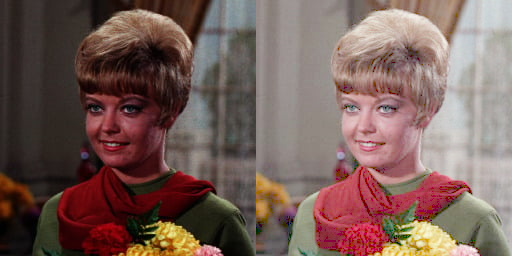

In [4]:
#@title praktikum 1
print("Gamma correction pada citra")
print("---------------------------")

# Menerima input user
try:
  gamma = int(input("Masukkan nilai gamma: "))
except ValueError:
  print("Input harus berupa angka")

# Load Image
img_gamma = cv.imread('/content/drive/MyDrive/PCVK_GANJIL_2024/female.jpg')

# Melakukan gamma correction
# Melakukan inverse gamma untuk melakukan koreksi
inv_gamma = 1 / gamma

# Normalisasi image
img_normalized = img_gamma / 255

# Melakukan penambahan gamma
img_gamma_correction = np.power(img_normalized, inv_gamma)

# Melakukan denormalisasi img gamma
img_gamma_correction = np.uint8(img_gamma_correction * 255)

# Menampilkan hasil
concate_img_gamma = cv.hconcat([img_gamma, img_gamma_correction])
cv2_imshow(concate_img_gamma)

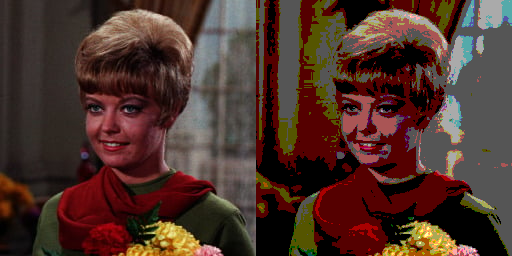

In [8]:
#@title praktikum 2
# Melakukan perhitungan nilai level untuk kuantisasi citra
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)

# Membuat array untuk depth image
depth_image = np.zeros(img.shape,img.dtype)

# Menghitung kuantisasi image
depth_image = np.uint8(np.round(img/ level) * level)

# Mengubah channel menjadi rentang 0 - 255
depth_image = np.clip(depth_image, 0, 255)

# Menampilkan hasil
concate_img_depth = cv.hconcat([img, depth_image])
cv2_imshow(concate_img_depth)


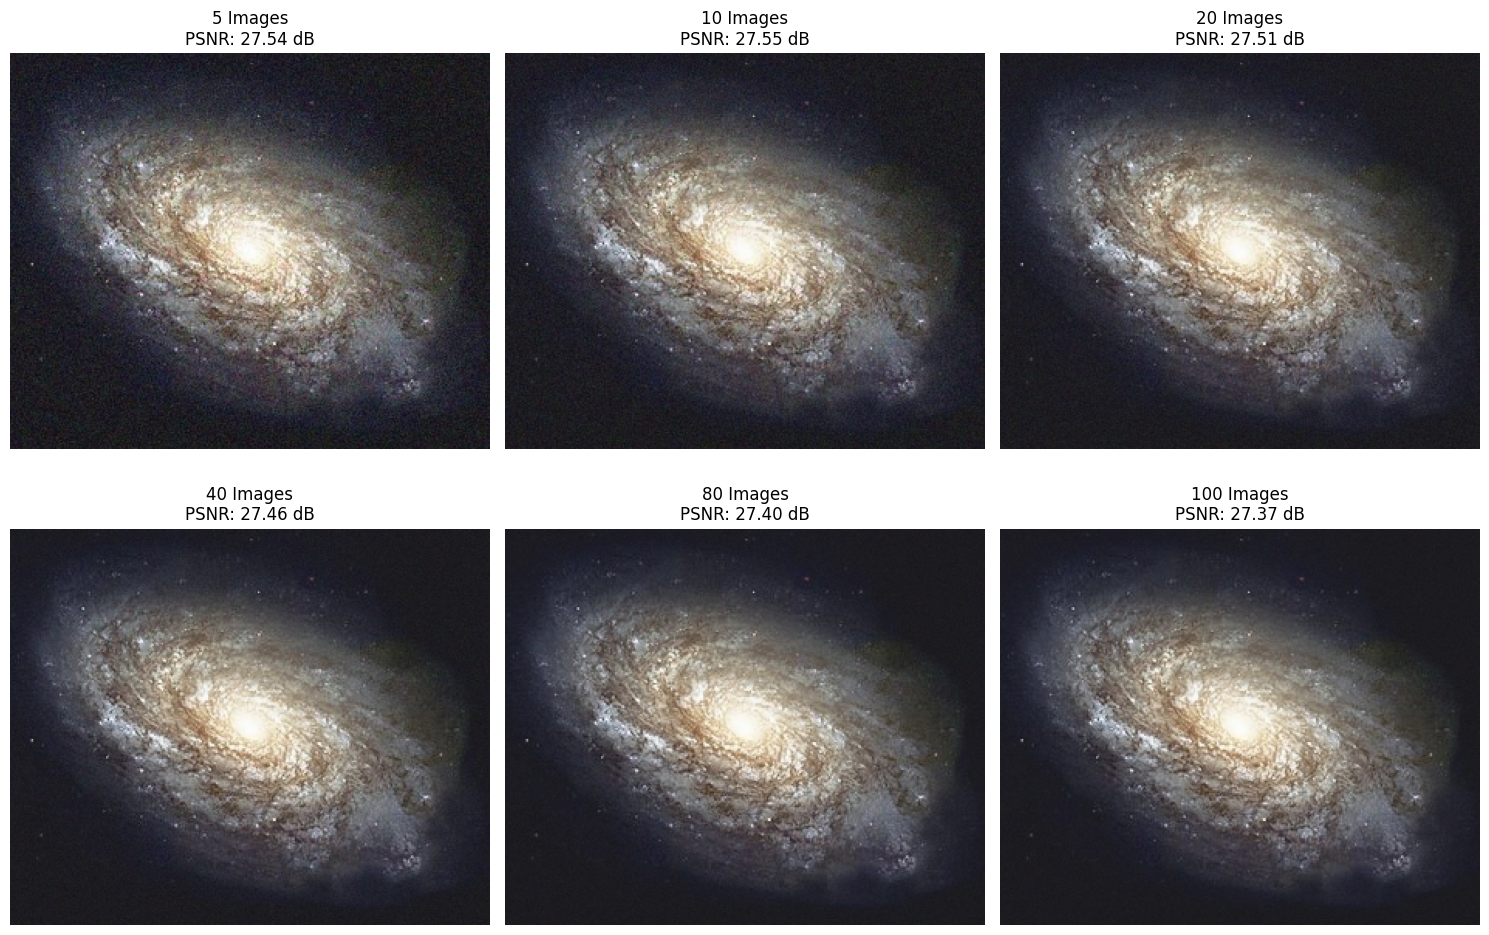

In [34]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt

# Fungsi untuk memuat gambar dari folder
def load_image(path, max_img):
    cv_img = []
    for count, img in enumerate(glob.glob(f'{path}/*.jpg')):
        if count >= max_img:
            break
        img = cv.imread(img)
        cv_img.append(img)
    return cv_img

# Fungsi untuk melakukan denoising dengan averaging
def denoising_image(images):
    denoised_images = np.array(images)
    average_image = np.mean(denoised_images, axis=0).astype(np.uint8)
    return average_image

# Fungsi untuk menghitung MSE
def mse_value(original_image, denoised_image):
    return np.mean((original_image - denoised_image) ** 2)

# Fungsi untuk menghitung PSNR
def psnr_value(original_image, denoised_image):
    mse = mse_value(original_image, denoised_image)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Path ke citra asli dan folder noisy
original_image_path = '/content/drive/MyDrive/PCVK_GANJIL_2024/galaxy.jpg'
noisy_images_path = '/content/drive/MyDrive/PCVK_GANJIL_2024/noises'

# Membaca citra asli
original_image = cv.imread(original_image_path)

# Memuat gambar noisy dengan berbagai jumlah
images_5 = load_image(noisy_images_path, 5)
images_10 = load_image(noisy_images_path, 10)
images_20 = load_image(noisy_images_path, 20)
images_40 = load_image(noisy_images_path, 40)
images_80 = load_image(noisy_images_path, 80)
images_100 = load_image(noisy_images_path, 100)

# List untuk menyimpan hasil gambar dan PSNR
results = []

# Melakukan average denoising dan menghitung PSNR untuk 5 gambar
denoised_image_5 = denoising_image(images_5)
psnr_5 = psnr_value(original_image, denoised_image_5)
results.append((5, denoised_image_5, psnr_5))

# Melakukan average denoising dan menghitung PSNR untuk 10 gambar
denoised_image_10 = denoising_image(images_10)
psnr_10 = psnr_value(original_image, denoised_image_10)
results.append((10, denoised_image_10, psnr_10))

# Melakukan average denoising dan menghitung PSNR untuk 20 gambar
denoised_image_20 = denoising_image(images_20)
psnr_20 = psnr_value(original_image, denoised_image_20)
results.append((20, denoised_image_20, psnr_20))

# Melakukan average denoising dan menghitung PSNR untuk 40 gambar
denoised_image_40 = denoising_image(images_40)
psnr_40 = psnr_value(original_image, denoised_image_40)
results.append((40, denoised_image_40, psnr_40))

# Melakukan average denoising dan menghitung PSNR untuk 80 gambar
denoised_image_80 = denoising_image(images_80)
psnr_80 = psnr_value(original_image, denoised_image_80)
results.append((80, denoised_image_80, psnr_80))

# Melakukan average denoising dan menghitung PSNR untuk 100 gambar
denoised_image_100 = denoising_image(images_100)
psnr_100 = psnr_value(original_image, denoised_image_100)
results.append((100, denoised_image_100, psnr_100))

# Menampilkan tabel hasil beserta gambar menggunakan Matplotlib
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Daftar jumlah gambar
num_images_list = [5, 10, 20, 40, 80, 100]

# Plot setiap gambar hasil denoising
for ax, (num_images, denoised_image, psnr), num_images in zip(axes.flat, results, num_images_list):
    ax.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
    ax.set_title(f"{num_images} Images\nPSNR: {psnr:.2f} dB")
    ax.axis('off')  # Hilangkan sumbu

# Sesuaikan jarak antar plot
plt.tight_layout()
plt.show()


Dari hasil gambar yang dilakukan average denoising sebanyak 5, 10, 20, dan seterusnya, dapat disimpulkan bahwa:

Semakin banyak gambar yang digunakan untuk proses average denoising, hasil gambar menjadi semakin jernih dan noise berkurang secara signifikan.
Dengan penggabungan lebih banyak gambar, algoritma mampu mengurangi lebih banyak variasi noise, yang membuat detail gambar asli lebih jelas terlihat.
Pada dasarnya, average denoising bekerja dengan mengambil rata-rata dari beberapa gambar dengan noise berbeda. Semakin banyak gambar yang digunakan, semakin efektif proses rata-ratanya dalam menetralkan noise yang acak.
Namun, ada batas optimal dalam penambahan gambar, karena pada titik tertentu penambahan gambar bisa menghasilkan diminishing returns (hasil yang tidak terlalu signifikan dibanding sebelumnya). Jadi, meskipun lebih banyak gambar menghasilkan gambar yang lebih bersih, peningkatan kualitas bisa menurun setelah mencapai jumlah tertentu.

Intinya:
Proses average denoising bekerja lebih baik dengan semakin banyak gambar, yang menjadikan gambar lebih jernih dan noise semakin berkurang.

Masking Image NOT
---------------------------


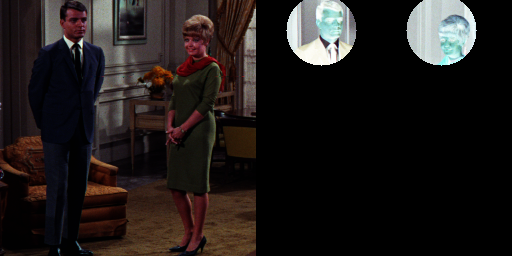

Masking Image OR
---------------------------


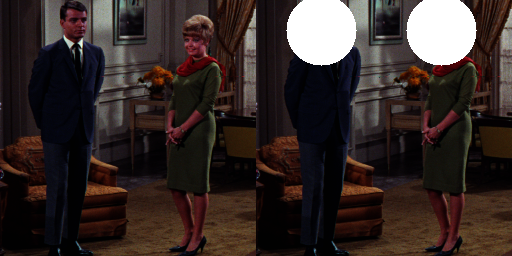

Masking Image AND
---------------------------


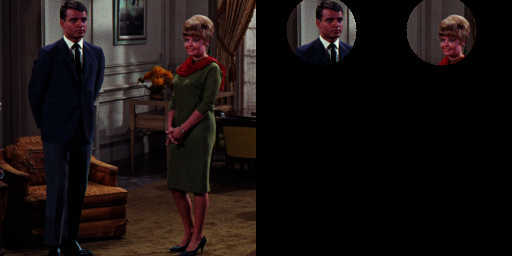

Masking Image NAND
---------------------------


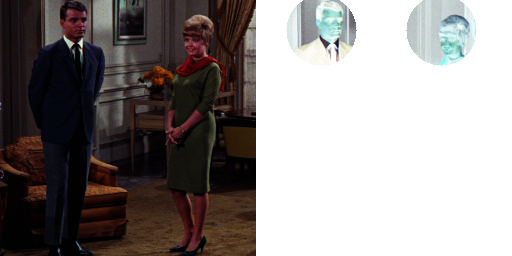

Masking Image XOR
---------------------------


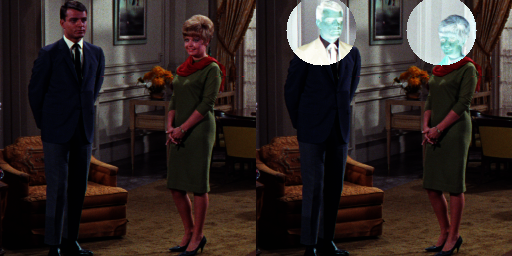

In [41]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Load original image
image_mask = cv.imread('/content/drive/MyDrive/PCVK_GANJIL_2024/couple.tiff')

# Melakukan pembuatan bidang mask
mask = np.zeros((256, 256, 3), dtype=np.uint8)
cv.circle(mask, (185, 30), 35, (255, 255, 255), -1)
cv.circle(mask, (65, 30), 35, (255, 255, 255), -1)

# Melakukan masking image NOT
gray_mask_img = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
masked_image_not = cv.bitwise_not(image_mask, mask=gray_mask_img)

# Menampilkan hasil dengan melakukan concat
print("Masking Image NOT")
print("---------------------------")
concate_img_not = cv.hconcat([image_mask, masked_image_not])
cv2_imshow(concate_img_not)  # Menggunakan cv2_imshow
cv.waitKey(0)

# Operasi Masking OR
masked_image_or = cv.bitwise_or(image_mask, mask)
print("Masking Image OR")
print("---------------------------")
concate_img_or = cv.hconcat([image_mask, masked_image_or])
cv2_imshow(concate_img_or)  # Gunakan cv2_imshow
cv.waitKey(0)

# Operasi Masking AND
masked_image_and = cv.bitwise_and(image_mask, mask)
print("Masking Image AND")
print("---------------------------")
concate_img_and = cv.hconcat([image_mask, masked_image_and])
cv2_imshow(concate_img_and)
cv.waitKey(0)

# Operasi Masking NAND
masked_image_nand = cv.bitwise_not(cv.bitwise_and(image_mask, mask))
print("Masking Image NAND")
print("---------------------------")
concate_img_nand = cv.hconcat([image_mask, masked_image_nand])
cv2_imshow(concate_img_nand)
cv.waitKey(0)

# Operasi Masking XOR
masked_image_xor = cv.bitwise_xor(image_mask, mask)
print("Masking Image XOR")
print("---------------------------")
concate_img_xor = cv.hconcat([image_mask, masked_image_xor])
cv2_imshow(concate_img_xor)
cv.waitKey(0)

cv.destroyAllWindows()


# **Berdasarkan hasil gambar tersebut dapat diketahui bahwa**

## 1. Masking Image NOT
- Pada operasi **NOT**, setiap piksel pada gambar yang termasuk dalam area mask (lingkaran) akan dibalik nilainya secara bitwise.
- **Hasil**: Bagian yang terkena mask (lingkaran) menampilkan warna yang berlawanan (invers), sedangkan bagian lainnya tetap seperti gambar asli.

## 2. Masking Image OR
- Pada operasi **OR**, piksel dari gambar asli dan mask dihitung berdasarkan logika OR bitwise. Jika salah satu piksel memiliki nilai selain 0, hasilnya adalah nilai tersebut.
- **Hasil**: Bagian gambar yang berada di dalam lingkaran mask berubah menjadi putih, karena pada mask, area lingkaran memiliki nilai 255 (putih).

## 3. Masking Image AND
- Pada operasi **AND**, piksel dari gambar dan mask dihitung berdasarkan logika AND bitwise. Hanya piksel yang memiliki nilai selain 0 pada kedua gambar yang akan dipertahankan.
- **Hasil**: Hanya bagian dalam lingkaran yang tetap terlihat, sedangkan bagian lain dari gambar berubah menjadi hitam karena piksel mask di luar lingkaran memiliki nilai 0.

## 4. Masking Image NAND
- Operasi **NAND** adalah kebalikan dari operasi AND. Setelah dilakukan operasi AND, hasilnya kemudian dibalik dengan operasi NOT.
- **Hasil**: Area di luar lingkaran tetap sama seperti gambar asli, sedangkan bagian dalam lingkaran menjadi versi invers dari gambar asli.

## 5. Masking Image XOR
- Pada operasi **XOR**, piksel dari gambar dan mask dihitung berdasarkan logika XOR bitwise. Jika satu piksel memiliki nilai dan piksel lainnya tidak, hasilnya akan menjadi nilai tersebut, sedangkan jika keduanya sama, hasilnya adalah 0 (hitam).
- **Hasil**: Area di dalam lingkaran berubah menjadi inversi warna, sementara bagian luar mask tetap tidak berubah.

---

## Kesimpulan
Setiap operasi logika menghasilkan efek yang berbeda:
- **NOT** membalik warna dalam area mask.
- **OR** memunculkan area putih di dalam mask.
- **AND** mempertahankan hanya bagian yang terkena mask.
- **NAND** menghasilkan inversi dari operasi AND.
- **XOR** menciptakan inversi warna pada area yang tertutup mask.